In [10]:
import pandas as pd
import numpy as np
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [11]:
train_data = pd.read_json("train.jsonl", lines=True, chunksize=100_000)
test_data = pd.read_json("test.jsonl", lines=True, chunksize=100_000)

In [12]:
#Let's examine number of sessions in train and test

with open("train.jsonl", 'r') as f:
    print(f"Train: {len(f.readlines()):,} lines")
with open("test.jsonl", 'r') as f:
    print(f"Test {len(f.readlines()):,} lines")

Train: 12,899,779 lines
Test 1,671,803 lines


In [13]:
#As it expected, dataset is realy big. So let's load the first chunk of data to examine structure of the datset

train_data_chunk = train_data.__next__()
train_data_chunk

,session,events
0,0,"[{'aid': 1517085, 'ts': 1659304800025, 'type':..."
1,1,"[{'aid': 424964, 'ts': 1659304800025, 'type': ..."
2,2,"[{'aid': 763743, 'ts': 1659304800038, 'type': ..."
3,3,"[{'aid': 1425967, 'ts': 1659304800095, 'type':..."
4,4,"[{'aid': 613619, 'ts': 1659304800119, 'type': ..."
...,...,...
99995,99995,"[{'aid': 1387489, 'ts': 1659326711310, 'type':..."
99996,99996,"[{'aid': 1091948, 'ts': 1659326711396, 'type':..."
99997,99997,"[{'aid': 366639, 'ts': 1659326711431, 'type': ..."
99998,99998,"[{'aid': 845181, 'ts': 1659326711611, 'type': ..."


In [17]:
#Now we may transform dataset to csv format

events_dict = {
    "session": [],
    "aid": [],
    "ts": [],
    "type": [],
}

for _, row in train_data_chunk.iterrows():
    for event in row["events"]:
        events_dict["session"].append(row["session"])
        events_dict["aid"].append(event["aid"])
        events_dict["ts"].append(event["ts"])
        events_dict["type"].append(event["type"])

train_part = pd.DataFrame(events_dict)
train_part

,session,aid,ts,type
0,0,1517085,1659304800025,clicks
1,0,1563459,1659304904511,clicks
2,0,1309446,1659367439426,clicks
3,0,16246,1659367719997,clicks
4,0,1781822,1659367871344,clicks
...,...,...,...,...
5227648,99999,1544954,1660373630318,clicks
5227649,99999,1032408,1660373656430,clicks
5227650,99999,1544954,1660373678083,clicks
5227651,99999,554230,1660373715477,clicks


In [22]:
n_sessions = train_part["session"].nunique()
n_events = train_part["type"].value_counts()

print(f"Number of sessions: {n_sessions}")
print(f"Number of events: \n{n_events}")



Number of sessions: 100000
Number of events: 
clicks    4770172
carts      364579
orders      92902
Name: type, dtype: int64
: 5227653


Text(0, 0.5, 'Count')

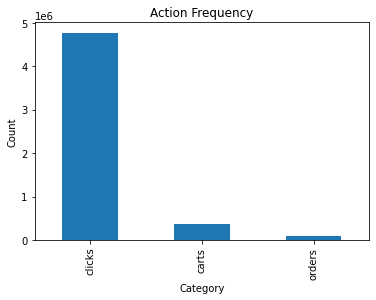

In [24]:
n_events.plot(kind="bar",title = "TEST")
plt.title("Action Frequency")
plt.xlabel("Category")
plt.ylabel("Count")

In [31]:
def count_minute(x):
    max_value = int(x.max())
    min_value = int(x.min())
    session_time = timedelta(microseconds=max_value - min_value)
    return session_time.total_seconds() / 60 

In [32]:
time_counts = train_part.groupby(['session'])['ts'].apply(count_minute)

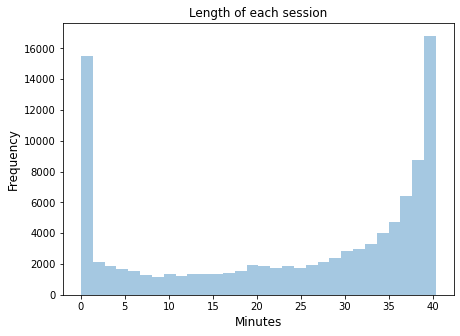

In [39]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.distplot(time_counts.values, ax=ax, bins=30, kde=False)
ax.set_title('Length of each session', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Minutes', fontsize=12)
plt.show()

In [ ]:
# Orders with Longer sessions 

In [44]:
session_counts = train_part.groupby(['session']).count()
order_in_session = train_part.groupby(['session']).apply(lambda x: x['type'].eq("orders").any())

In [48]:
order_in_session.head()

session
0     True
1    False
2    False
3     True
4     True
dtype: bool

In [47]:
combined_data = pd.concat([session_counts["aid"], time_counts, order_in_session], axis=1)
combined_data

,aid,ts,0
session,,,
0,276,39.669728,True
1,32,40.167583,False
2,33,40.156927,False
3,226,30.081111,True
4,19,38.031353,True
...,...,...,...
99995,21,29.051198,False
99996,302,38.349066,True
99997,112,39.466346,True


In [50]:
print(f"Mean time spend by users who order: {combined_data.loc[combined_data[0] == True]['ts'].mean()}")
print(f"Mean time spend by users who didn't order: {combined_data.loc[combined_data[0] == False]['ts'].mean()}")

Mean time spend by users who order: 32.69724419896134
Mean time spend by users who didn't order: 21.352928021914465


In [51]:
print(f"Mean time spend by users who order: {combined_data.loc[combined_data[0] == True]['aid'].mean()}")
print(f"Mean time spend by users who didn't order: {combined_data.loc[combined_data[0] == False]['aid'].mean()}")

Mean time spend by users who order: 120.8487965175828
Mean time spend by users who didn't order: 31.291453348657402


In [ ]:
print("Maximum Purchased item with Product Code: \n",train['product_code'].value_counts().head(5))

### Most Clicked Product

In [ ]:
event_click = train[train["event_type"]== "clicks"].sort_values("product_code",ascending= False)
least_pro= event_click.tail(5)
print("Top 5 most Clicked item: \n",event_click["product_code"].value_counts().head(5))

### Most ordered item

In [ ]:
event_order = train[train["event_type"]== "orders"].sort_values("product_code",ascending= False)
print("Top 5 most ordered item: \n",event_order["product_code"].value_counts().head(5))

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(cust_group['product_code'], kde=False, bins=100)
plt.title('Distribution of number of products viewed by customer')
plt.xlabel('Number of products viewed')
plt.ylabel('Number of customers')
plt.show()


In [ ]:
## Product ordered < 50 
grouped_train_orders = test[test['event_type'] == 'orders'].groupby('customer_id').count().join(grouped_train, lsuffix='_orders', rsuffix='_views') 
display(grouped_train_orders)


In [ ]:
grouped_train = test.groupby(['product_code']).count()
display(grouped_train)